In [3]:
#importo le librerie utili
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep="\s+",
                     names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()
boston.info()

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wb/kbfflkgd24l9kfh0dvs2fsj40000gn/T/ipykernel_96579/2160580368.py:9: SyntaxWarning: invalid escape sequence '\s'
  boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep="\s+",


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    float64
 10  PRATIO  506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
#per scegliere le proprietà sulle quali effettuare la regressione guardo le correlazioni
boston.corr()                       #-1 corr inversa, 0 corr scarsa o nulla, 1 corr diretta

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Seaborn per visualizzazione migliore della matrice di correlazione

<Axes: >

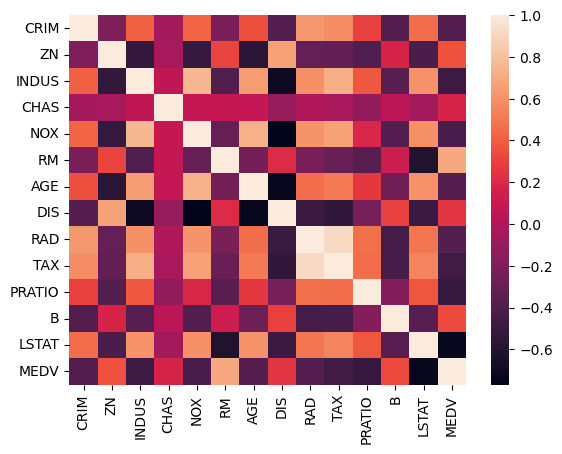

In [5]:
import seaborn as sns
sns.heatmap(boston.corr(), xticklabels=boston.columns, yticklabels=boston.columns)

<Axes: >

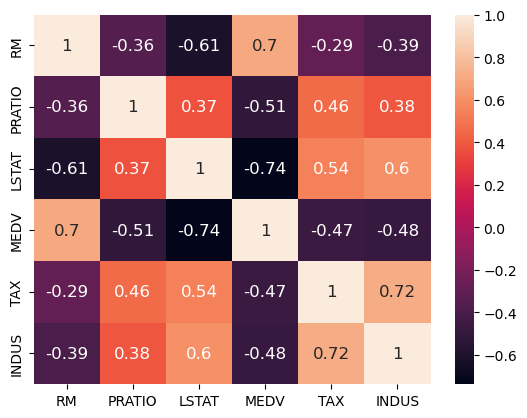

In [8]:
#prendo delle colonne che hanno una correlazione forte (anche inversa) col valore medio MEDV
cols = ["RM", "PRATIO", "LSTAT", "MEDV", "TAX", "INDUS"]
sns.heatmap(boston[cols].corr(), xticklabels=boston[cols].columns, yticklabels=boston[cols].columns,             #rifaccio una heatmap
            annot=True, annot_kws={'size': 12})        

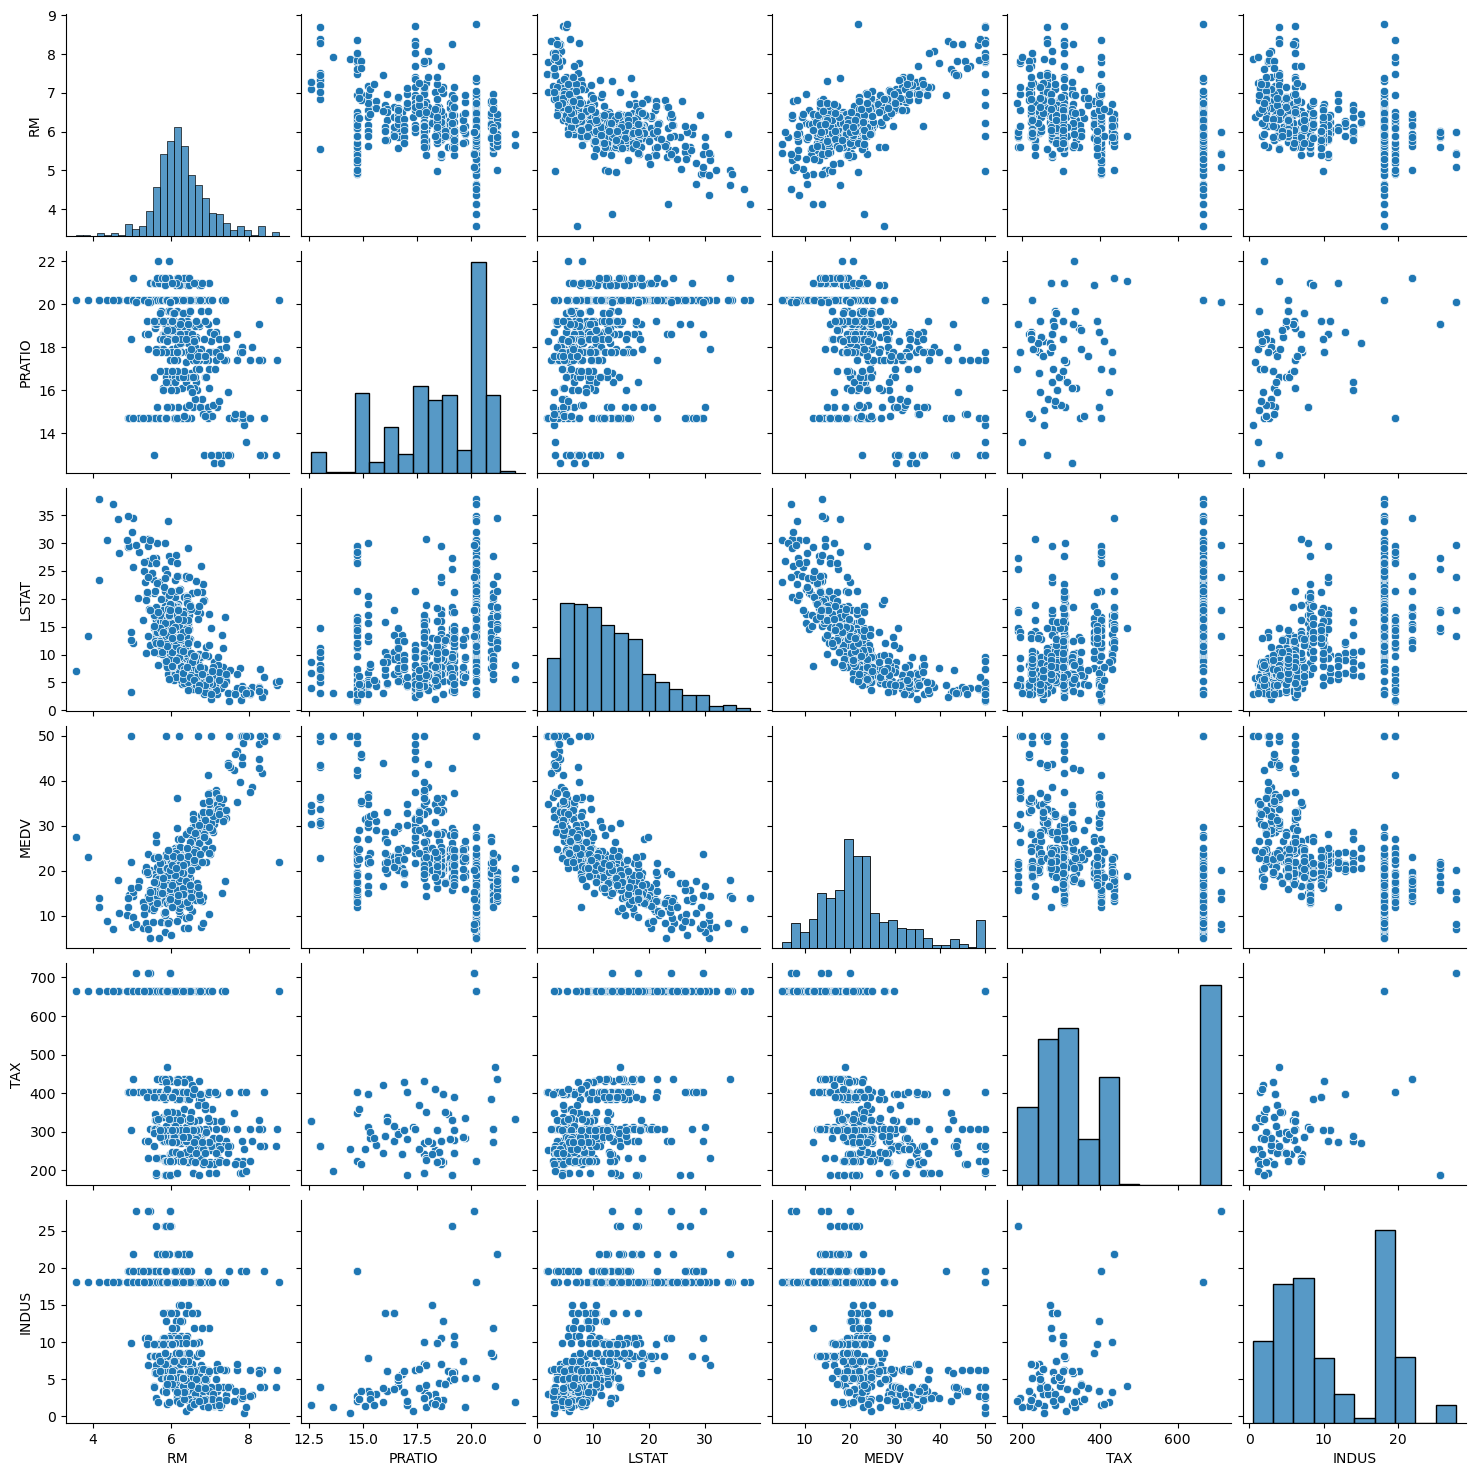

In [9]:
#creo dei grafici a coppie per avere un'altra visualizzazione
sns.pairplot(boston[cols])                  #guardo i valori di MEDV sull'asse delle y

In [15]:
#MEDV e LSTAT hanno una correlazione ben definita (si vede/legge meglio dal heatmap di prima)
X = boston[["RM", "LSTAT"]].values                #proprietà scelte
Y = boston["MEDV"].values                       #target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)        #random_state per una migliore riproducibilità
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print("MSE: " +str(mean_squared_error(Y_pred, Y_test)))                     #errore quadratico medio
print("R2 score: " +str(r2_score(Y_pred, Y_test)))                          #errore di determinazione
#buon punteggio

MSE: 32.72507169281495
R2 score: 0.41179046970700994


In [16]:
#provo a rifare il modello utilizzando tutte le proprietà per confrontare le prestazioni
X = boston.drop("MEDV", axis=1).values              #proprietà escluse il target
Y = boston["MEDV"].values                           #target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#eseguo una standardizzazione poichè sto considerando tutte le proprietà
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, Y_train)
Y_pred = lr.predict(X_test_std)

print("MSE: " +str(mean_squared_error(Y_pred, Y_test)))                     
print("R2 score: " +str(r2_score(Y_pred, Y_test)))  
#sono migliori rispetto al modello prima

MSE: 27.195965766883198
R2 score: 0.5291006947760479
